### CSCI 470 Project:
### Natural Language Processing Disaster Tweets
Jake Hirsch, Michael Hargraves
07/15/2025

In [17]:
# ! pip install pandas
# ! pip install numpy
# ! pip install scikit-learn
# ! pip
# ! pip install matplotlib
# ! pip install transformers
# ! pip install datasets
# ! pip install torch
# ! pip install seaborn

In [18]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from transformers import BertTokenizerFast, Trainer
from datasets import Dataset

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### Load and Inspect the Training Data

In this step, we load the training dataset and explore its structure to understand what we're working with.

In [19]:
# Load the training dataset
train_df = pd.read_csv("train.csv")

# Inspect the first few rows
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Preprocess the Text Data

We clean the tweets by lowercasing, removing punctuation, and stripping extra whitespace.


In [20]:
# Define a preprocessing function for tweets
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply preprocessing
train_df["clean_text"] = train_df["text"].apply(preprocess_text)

# Display a sample
train_df[["text", "clean_text"]].head()


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


### Vectorize the Cleaned Text Using TF-IDF

We use `TfidfVectorizer` from scikit-learn to convert the cleaned text into numerical vectors for model training.


In [21]:
# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the cleaned text
X = vectorizer.fit_transform(train_df["clean_text"])

# Target labels
y = train_df["target"]


### Split into Training and Test Sets

We split the data into training and testing subsets to evaluate our model fairly.


In [22]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm dimensions
X_train.shape, X_test.shape


((6090, 22394), (1523, 22394))

## Train and Evaluate a Naive Bayes Model

We will now train a `MultinomialNB` classifier on our TF-IDF features and evaluate its performance on the test set.


In [23]:
# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

### Generate Predictions

We use the trained model to predict labels for the test set.


In [24]:
# Predict on the test set
y_pred = nb_model.predict(X_test)


### Evaluate the Model

We evaluate using accuracy and a classification report.


Accuracy: 0.7971

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       874
           1       0.87      0.62      0.72       649

    accuracy                           0.80      1523
   macro avg       0.82      0.77      0.78      1523
weighted avg       0.81      0.80      0.79      1523



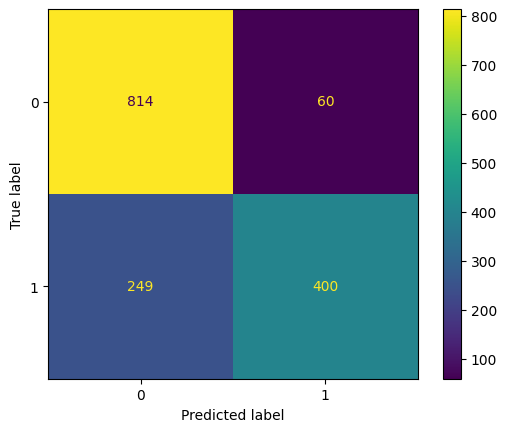

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


### Model Comparison and Final Reflections

In this final phase, we:
1. Try an alternative model (`LogisticRegression`) for comparison.
2. Analyze results from both models.
3. Write conclusions and future work ideas.


### Train and Evaluate Logistic Regression

We use `LogisticRegression` from scikit-learn to see if it performs better than Naive Bayes on the same features.


In [26]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
log_preds = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.8011

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.84      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523



##  Conclusion

- **Model Performance**: Naive Bayes is fast and simple, but Logistic Regression may offer better accuracy and precision, depending on the dataset.
- **TF-IDF Features**: Using TF-IDF is a strong baseline for text classification tasks.
- **Further Improvements**:
  - Try more advanced models (e.g., Random Forest, Gradient Boosting, or Transformers).
  - Use text preprocessing with stopword removal and stemming/lemmatization.
  - Perform hyperparameter tuning with `GridSearchCV`.

This concludes our project on classifying disaster tweets with machine learning! 🎉


In [29]:
# --- Load Data ---
train_df = pd.read_csv("train.csv")

# --- Preprocessing ---
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_df["clean_text"] = train_df["text"].astype(str).apply(preprocess_text)
train_df = train_df.dropna(subset=["clean_text", "target"])

# ============================
# MODEL 1: Naive Bayes (TF-IDF)
# ============================
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df["clean_text"])
y = train_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
nb_f1 = f1_score(y_test, nb_preds)

# ==============================
# MODEL 2: Logistic Regression
# ==============================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
log_f1 = f1_score(y_test, log_preds)

# ==============================
# MODEL 3: Keras Deep Learning
# ==============================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["clean_text"])
sequences = tokenizer.texts_to_sequences(train_df["clean_text"])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(
    padded, y, test_size=0.2, random_state=42
)

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_pad, epochs=10, validation_data=(X_test_pad, y_test_pad), verbose=0)

y_pred_dl_probs = model.predict(X_test_pad)
y_pred_dl = (y_pred_dl_probs > 0.5).astype(int).reshape(-1)

dl_acc = accuracy_score(y_test_pad, y_pred_dl)
dl_f1 = f1_score(y_test_pad, y_pred_dl)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


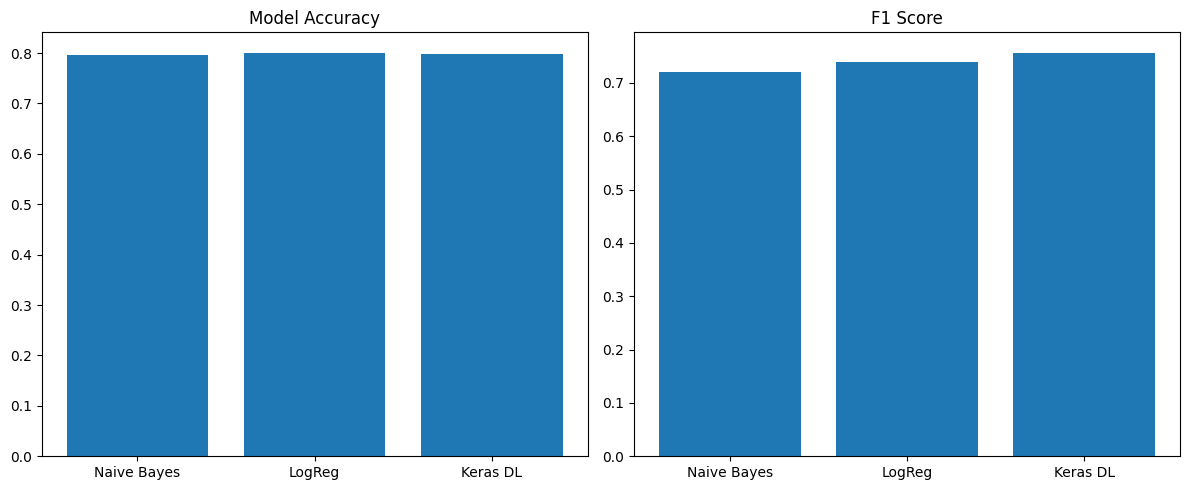

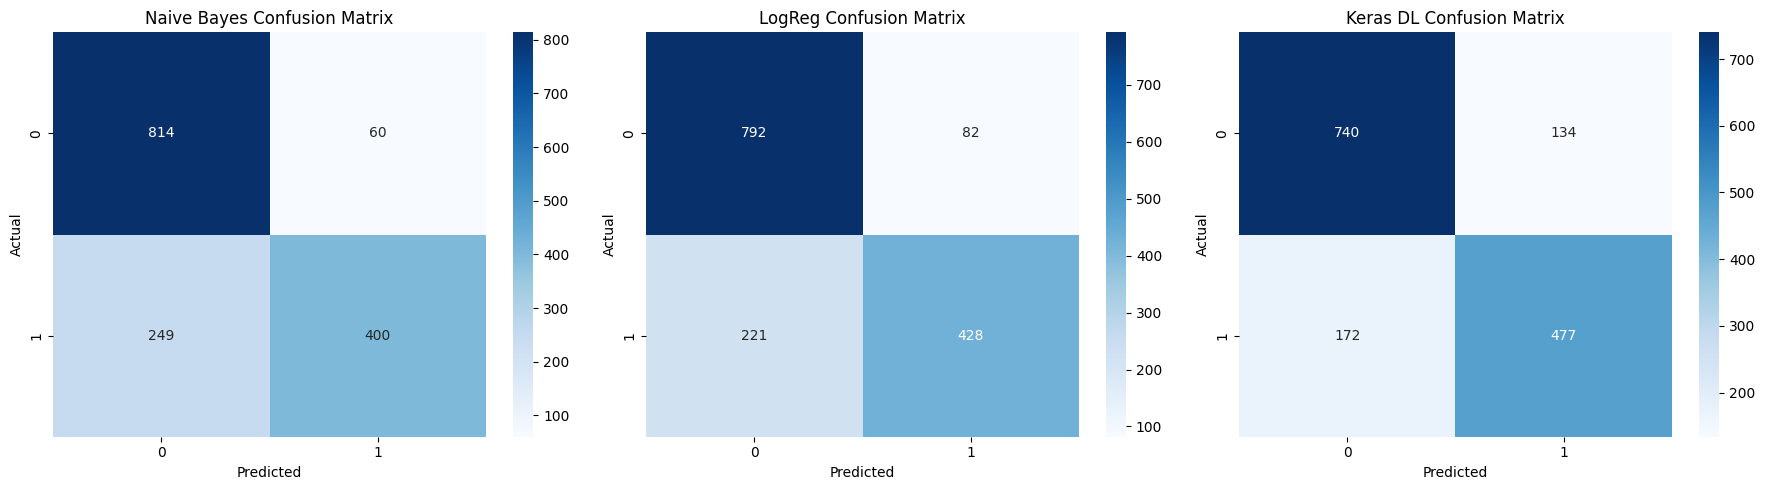

In [30]:
# =============================
# VISUALIZATION
# =============================

# Accuracy & F1 Score Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

models = ["Naive Bayes", "LogReg", "Keras DL"]
accuracies = [nb_acc, log_acc, dl_acc]
f1s = [nb_f1, log_f1, dl_f1]

ax[0].bar(models, accuracies)
ax[0].set_title("Model Accuracy")
ax[1].bar(models, f1s)
ax[1].set_title("F1 Score")
plt.tight_layout()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (title, pred) in enumerate(zip(models, [nb_preds, log_preds, y_pred_dl])):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f"{title} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()